# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme



```markdown
-   un scatterplot affiche des points sur un plan, avec chaque point qui représente une observation avec 2 valeurs numériques. On l'utilise pour visualiser la relation entre deux variables continues.
-   un barplot utilise des barres pour représenter des données catégorielles. On l'utilise pour comparer des quantitées discrète ou des longueurs entre différentes catégories.
-  un boxplot  montre la distribution des données basée sur un résumé en cinq nombres : minimum, premier quartile (Q1), médiane, troisième quartile (Q3), et maximum. Il est utilisé pour visualiser la distribution des données et identifier les valeurs aberrantes
-   un violinplot combine les aspects d'un boxplot et d'un kernel density plot. Il est utilisé pour visualiser la distribution des données et comparer les distributions entre plusieurs groupes
-   un histogramme divise les données en intervalles et affiche la fréquence ou la densité des données dans chaque intervalle sous forme de barres. Il est utilisé pour visualiser la distribution d'une seule variable continue
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Le fichier overview.txt est dans le format TSV où chaque ligne représente un enregistrement ou une observation, les valeurs sont séparées par des tabs et la première ligne contient les en-têtes de colonnes, qui décrivent les champs de données.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Le fichier overview.txt comporte un rapport des organismes qui ont un ou plusieurs projets de séquençage du génome qui peut être complet, en cours ou planifié. Ainsi, pour chaque colonne ont a :                                                                               
- Organism/Name : Nom de l'organisme au niveau de l'espèce.                                                     
- Kingdom      : Division taxonomique : Archaea, Bacteria, Eukaryota, ou Viruses.                               
- Group        : Groupe communément utilisé pour classer les organismes.                                       
- SubGroup     : Niveau taxonomique de la NCBI en dessous du groupe.                                          
- Size (Mb)    : Taille estimée du génome en mégabases (Mb).
- Chrs         : Nombre de chromosomes présents dans l'organisme.                                                
- Organelles   :  Nombre d'organites présents dans l'organisme.                                               
- Plasmids    : Nombre de plasmides présents dans l'organisme.                                                
- BioProjects  : Nombre de projets de séquençage du génome associés à cet organisme.     

```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [186]:
import csv

filepath = "overview.txt"

def get_file():
    data = []
    with open(filepath) as file:
        tsvreader = csv.reader(file, delimiter="\t")
        for line in tsvreader:
            data.append(line)
        return data[1:]
        
data = get_file()
print(len(data))

87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Un royaume est le niveau de classification le plus élevé au niveau des rangs classique juste après le Domaine et la Vie, le royaume est divisé en sous-groupes à différents niveaux en dessous de lui qui sont : Division, Classe, Ordre, Famille, Genre et Espèce.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y en a 4 qui sont : Archaea, Bacteria, Eukaryota, or Viruses
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [189]:
dico = {}

for line in data:
    if (line[1] not in dico.keys()):
        dico[line[1]] = 1
    else:
        dico[line[1]] += 1

print(dico)

{'Bacteria': 37492, 'Viruses': 32573, 'Eukaryota': 15560, 'Archaea': 2263}


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un groupe est un organisme commun
```

Q9. Combien de groupes sont présents par royaume ?

In [190]:
dico = {}

for line in data:
    if line[1] not in dico:
        dico[line[1]] = [line[2]]
    else:
        if line[2] not in dico[line[1]]:
            dico[line[1]].append(line[2])
    

for key, value in dico.items():
    print(key , " : ", len(value))

Bacteria  :  37
Viruses  :  8
Eukaryota  :  5
Archaea  :  11


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [192]:
dico = {}

for line in data:
    if line[1] not in dico:
        dico[line[1]] = {}

    dico[line[1]][line[2]] = dico[line[1]].get(line[2], 0) + 1

for key, value in dico.items():
    print(key)
    for k, v in value.items():
        print(k, " : ", v)

Bacteria
Terrabacteria group  :  13337
unclassified Bacteria  :  346
FCB group  :  5037
Pseudomonadota  :  11098
Acidobacteriota  :  256
Synergistota  :  85
Bacteria incertae sedis  :  3872
PVC group  :  1091
Myxococcota  :  146
Campylobacterota  :  256
Thermodesulfobacteriota  :  568
Spirochaetota  :  344
Aquificota  :  42
Thermotogota  :  72
Atribacterota  :  43
Other  :  2
Bdellovibrionota  :  122
delta/epsilon subdivisions  :  288
Caldisericota/Cryosericota group  :  21
Deferribacterota  :  27
Calditrichota  :  10
Candidatus Lernaellota  :  2
Elusimicrobiota  :  118
Fusobacteriota  :  79
Candidatus Deferrimicrobiota  :  2
Nitrospinota/Tectimicrobiota group  :  39
Candidatus Hinthialibacterota  :  2
Candidatus Krumholzibacteriota  :  4
Nitrospirota  :  156
Candidatus Moduliflexota  :  2
Candidatus Tharpellota  :  2
Chrysiogenota  :  6
Coprothermobacterota  :  5
Dictyoglomota  :  5
environmental samples  :  4
Thermodesulfobiota  :  2
Thermosulfidibacterota  :  1
Viruses
Other  :  305

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

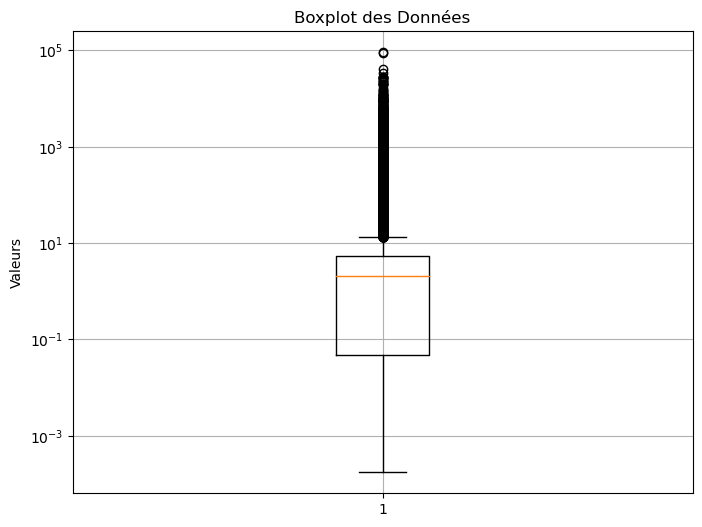

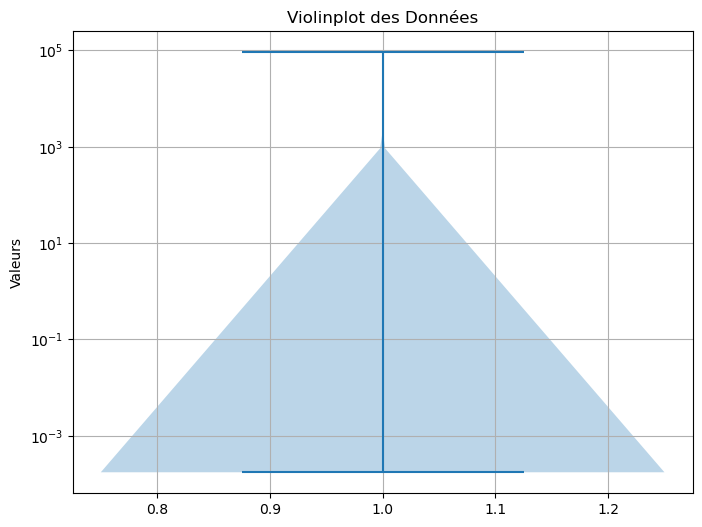

In [194]:
import matplotlib.pyplot as plt

vals = []

for line in data:
    try:
        vals.append(float(line[4]))
    except ValueError:
        continue

# Création du boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(vals)
plt.title('Boxplot des Données')
plt.ylabel('Valeurs')
plt.yscale('log')
plt.grid(True)
plt.show()

# Création du violinplot
plt.figure(figsize=(8, 6))
plt.violinplot(vals)
plt.title('Violinplot des Données')
plt.ylabel('Valeurs')
plt.yscale('log')
plt.grid(True)
plt.show()


Q12. Affichez la distribution par royaume.

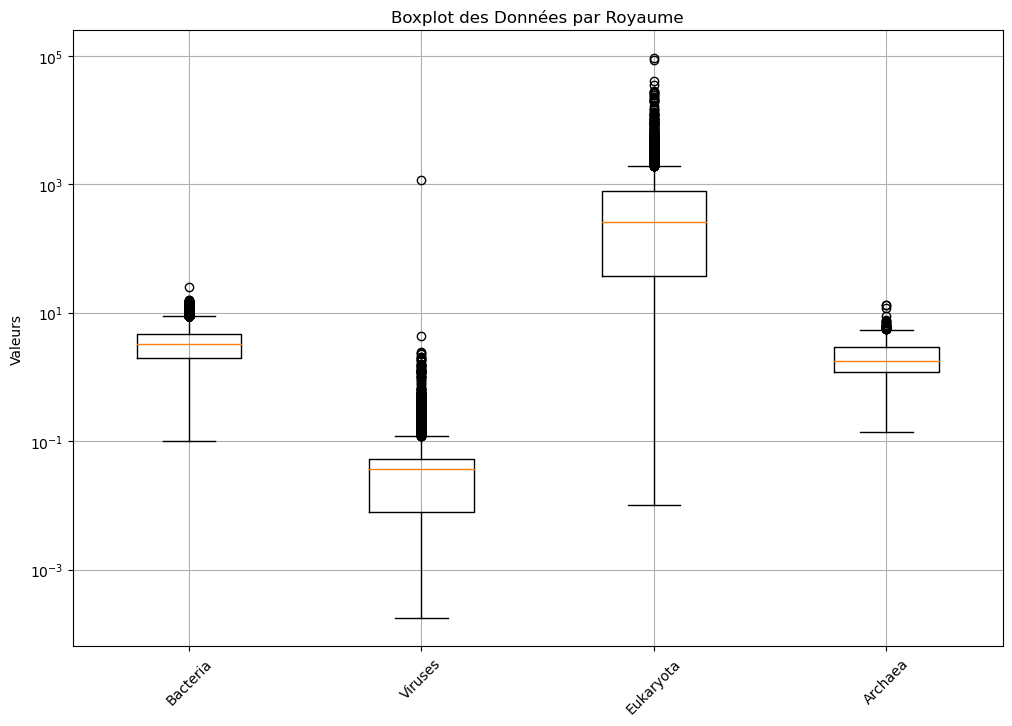

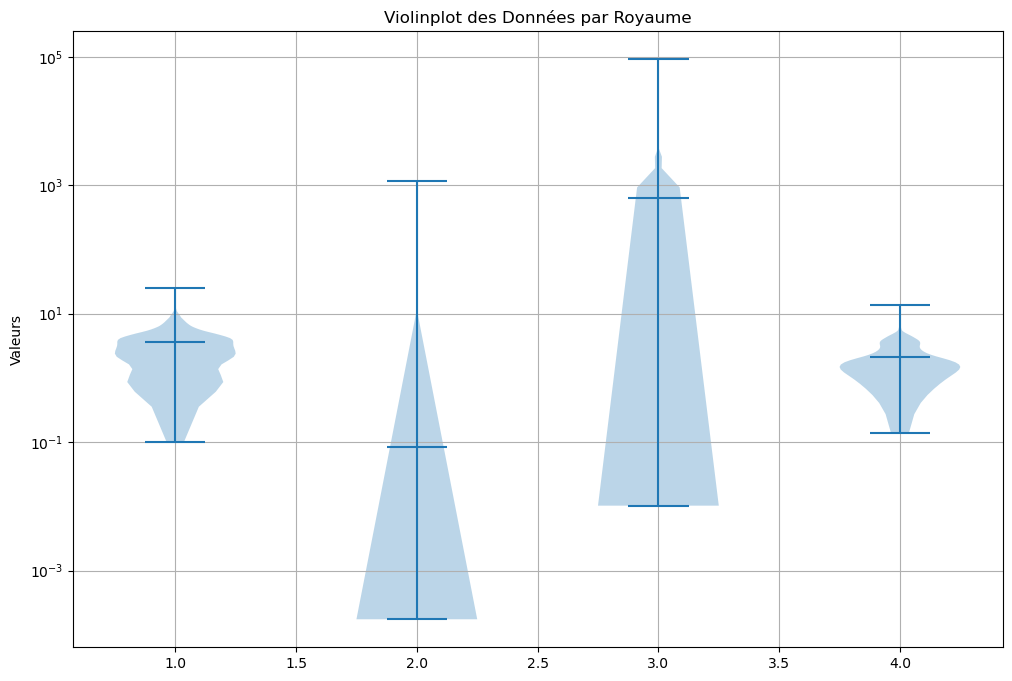

In [198]:
import numpy as np

dico = {}
vals = {}

for line in data:
    royaume = line[1]
    valeur = line[4]
    if royaume not in dico:
        dico[royaume] = 1
        vals[royaume] = []
    else:
        try:
            vals[royaume].append(float(valeur))
        except ValueError:
            continue

# Création des boxplots par royaume
plt.figure(figsize=(12, 8))
plt.boxplot([vals[royaume] for royaume in vals], labels=vals.keys())
plt.title('Boxplot des Données par Royaume')
plt.ylabel('Valeurs')
plt.yscale('log')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Création des violinplots par royaume
plt.figure(figsize=(12, 8))
plt.violinplot([vals[royaume] for royaume in vals], showmeans=True)
plt.title('Violinplot des Données par Royaume')
plt.ylabel('Valeurs')
plt.yscale('log')
plt.grid(True)
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

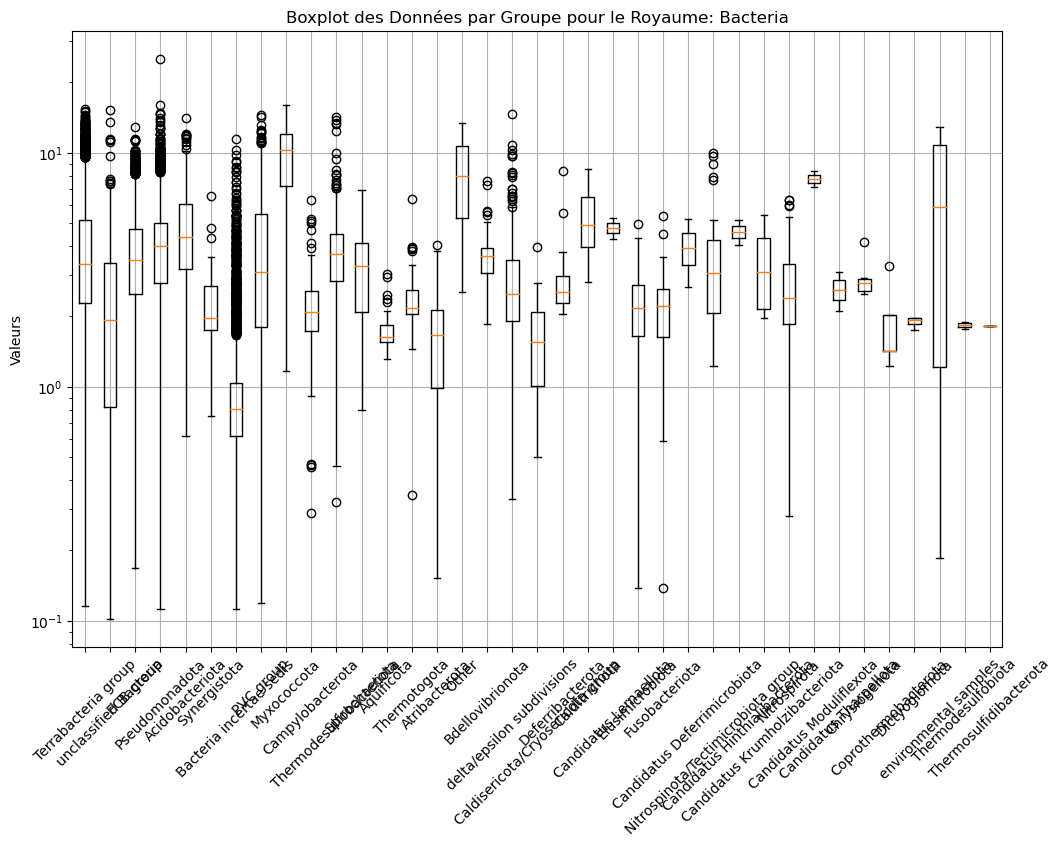

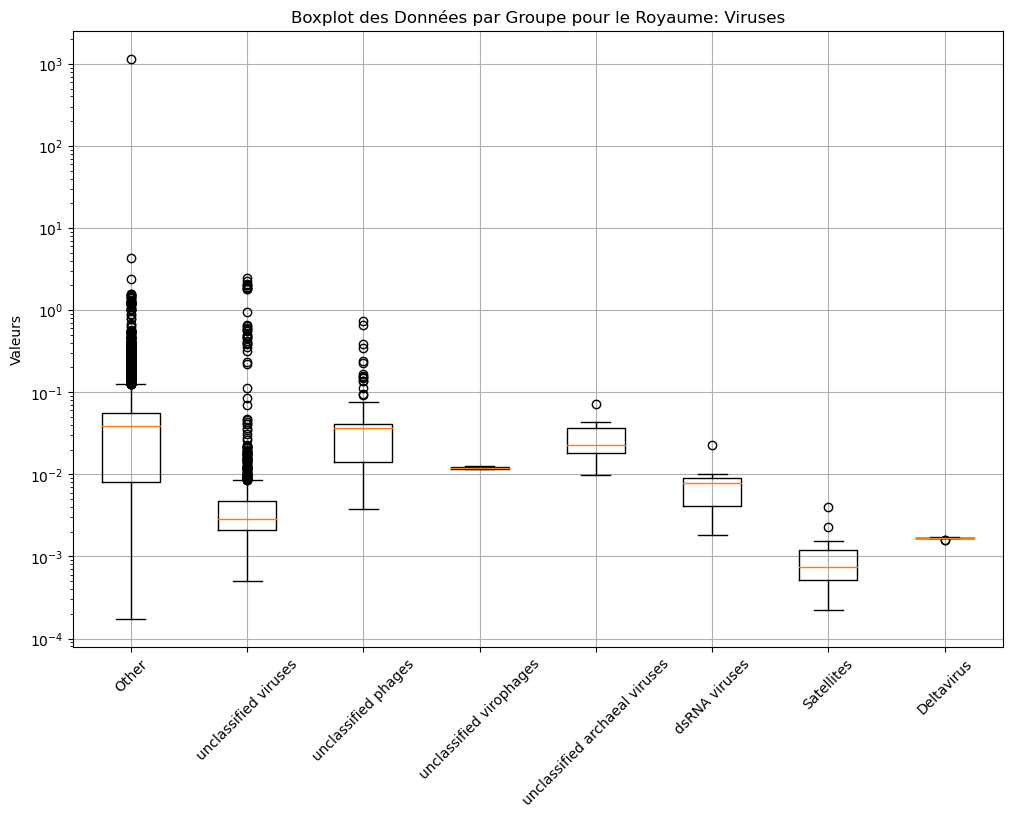

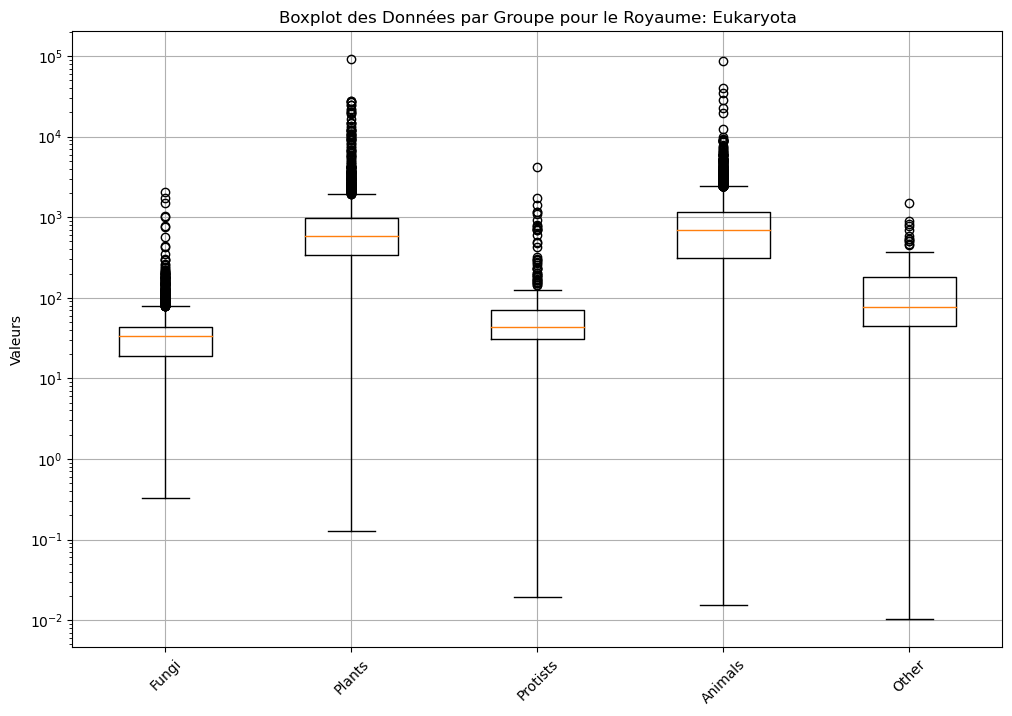

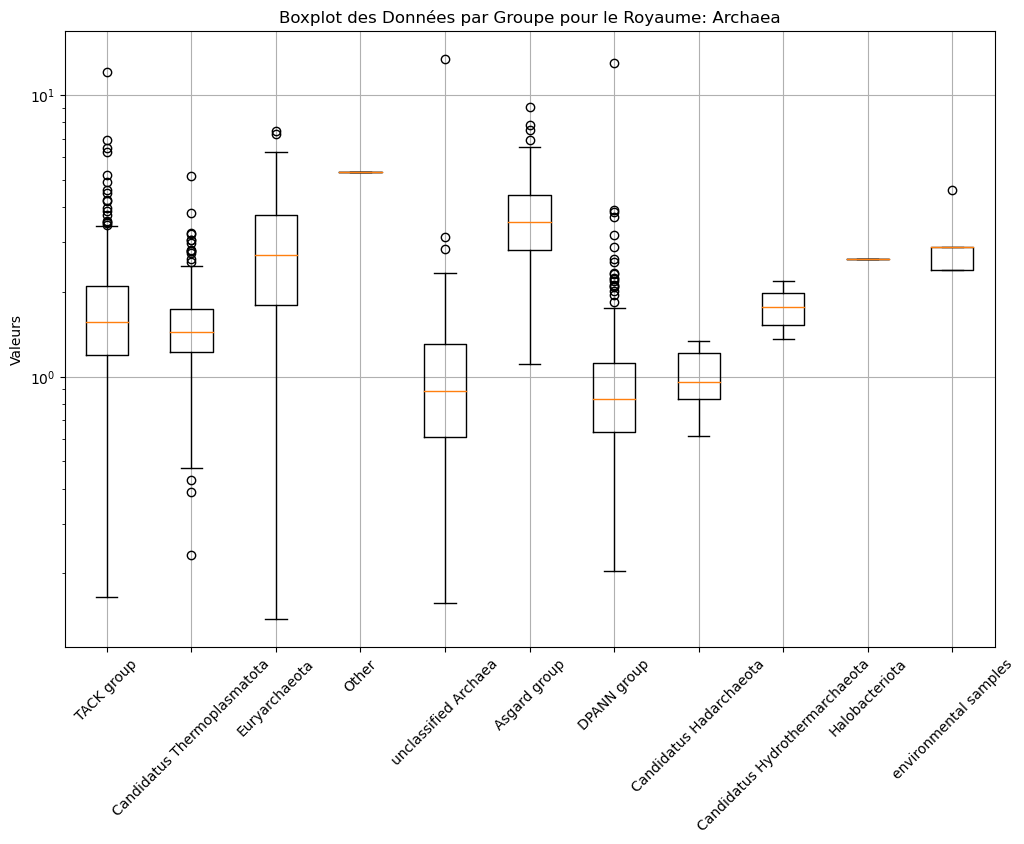

In [200]:
dico = {}
vals = {}

for line in data:
    royaume = line[1]
    groupe = line[2]
    valeur = line[4]

    if royaume not in dico:
        dico[royaume] = {groupe: []}
    if groupe not in dico[royaume]:
        dico[royaume][groupe] = []

    try:
        dico[royaume][groupe].append(float(valeur))
    except ValueError:
        continue

# Convert lists to numpy arrays for plotting
for royaume in dico:
    vals[royaume] = {groupe: np.array(valeurs) for groupe, valeurs in dico[royaume].items()}

# Plotting the distribution by group for each kingdom
for royaume, group_data in vals.items():
    plt.figure(figsize=(12, 8))
    plt.boxplot([group_data[groupe] for groupe in group_data], labels=group_data.keys())
    plt.title(f'Boxplot des Données par Groupe pour le Royaume: {royaume}')
    plt.ylabel('Valeurs')
    plt.yscale('log')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [204]:
dico = {}
dico_values = {}

def check_min(value, name, group_name):
    if group_name not in dico_values:
        dico_values[group_name] = (value, name)
    else:
        if dico_values[group_name][0] > value:
            dico_values[group_name] = (value, name)

for line in data:
    kingdom = line[1]
    organism = line[0]
    genome_size = line[4]

    try:
        genome_size = float(genome_size)
    except ValueError:
        continue

    if kingdom not in dico:
        dico[kingdom] = [organism]
    else:
        dico[kingdom].append(organism)

    check_min(genome_size, organism, kingdom)

for kingdom, (min_value, min_orga) in dico_values.items():
    print(f"Kingdom: {kingdom}, Smallest Genome Organism: {min_orga}, Genome Size: {min_value} Mb")

Kingdom: Bacteria, Smallest Genome Organism: bacterium AG-323-L21, Genome Size: 0.101587 Mb
Kingdom: Viruses, Smallest Genome Organism: Hippotragine gammaherpesvirus 1, Genome Size: 0.000174 Mb
Kingdom: Eukaryota, Smallest Genome Organism: Fragilariopsis kerguelensis, Genome Size: 0.010223 Mb
Kingdom: Archaea, Smallest Genome Organism: candidate division MSBL1 archaeon SCGC-AAA385M02, Genome Size: 0.137797 Mb


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [206]:
dico = {}
dico_values = {}

def check_max(value, name, group_name):
    if group_name not in dico_values:
        dico_values[group_name] = (value, name)
    else:
        if dico_values[group_name][0] < value:
            dico_values[group_name] = (value, name)


for line in data:
    kingdom = line[1]
    organism = line[0]
    genome_size = line[4]

    try:
        genome_size = float(genome_size)
    except ValueError:
        continue

    if kingdom not in dico:
        dico[kingdom] = [organism]
    else:
        dico[kingdom].append(organism)

    check_max(genome_size, organism, kingdom)

for kingdom, (max_value, max_orga) in dico_values.items():
    print(f"Kingdom: {kingdom}, Biggest Genome Organism: {max_orga}, Genome Size: {max_value} Mb")

Kingdom: Bacteria, Biggest Genome Organism: Thiomonas, Genome Size: 25.1426 Mb
Kingdom: Viruses, Biggest Genome Organism: uncultured virus, Genome Size: 1150.68 Mb
Kingdom: Eukaryota, Biggest Genome Organism: Viscum album, Genome Size: 91113.7 Mb
Kingdom: Archaea, Biggest Genome Organism: archaeon, Genome Size: 13.3999 Mb


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

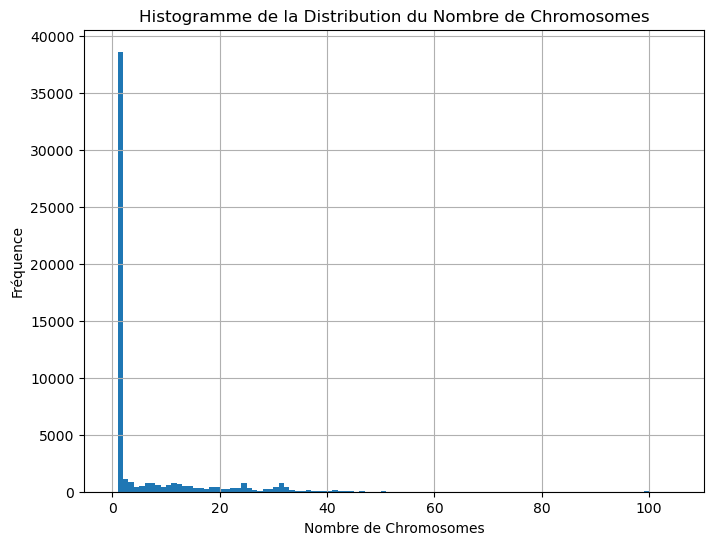

In [58]:
data = []
kngdms = set()
maxim = 0

def load_data():
    idx = 0
    with open("overview.txt") as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        for line in tsvreader:
            if idx == 0:
                idx += 1
                continue
            data.append(line)
            kngdms.add(line[1])

load_data()

for line in data:
    number_chroms = line[5]
    if number_chroms == '-':
        continue
    number_chroms = int(number_chroms)
    if number_chroms > maxim:
        maxim = number_chroms
    try:
        chromosome_counts.append(number_chroms)
    except ValueError:
        continue

plt.figure(figsize=(8, 6))
plt.hist(chromosome_counts, bins=range(maxim + 1))
plt.title('Histogramme de la Distribution du Nombre de Chromosomes')
plt.xlabel('Nombre de Chromosomes')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

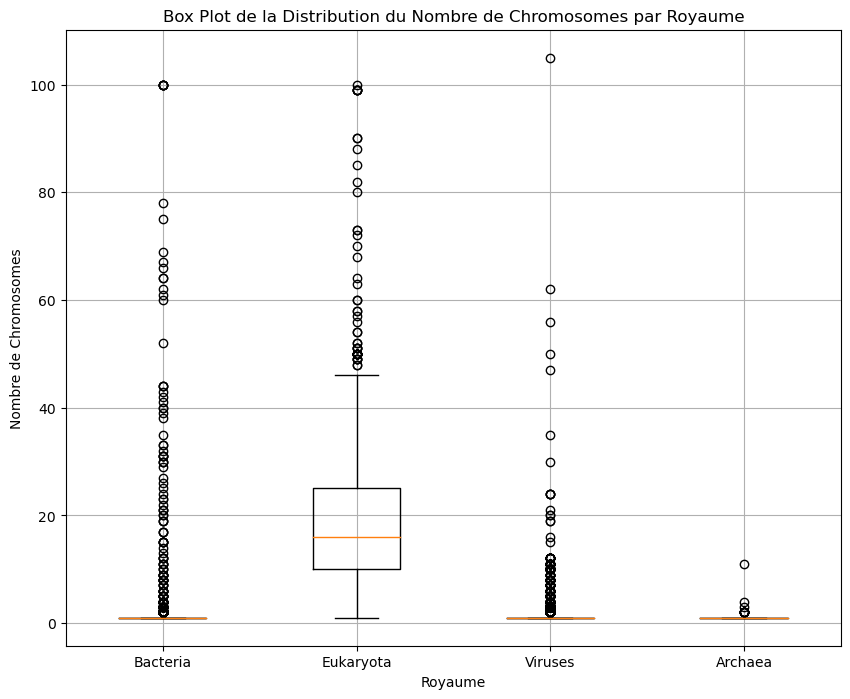

In [49]:
vals = []
labels = []
for kngdm in kngdms:
    kngdm_vals = [int(line[5]) for line in data if line[1] == kngdm and line[5] != '-']
    if kngdm_vals:
        vals.append(kngdm_vals)
        labels.append(kngdm)
            
plt.figure(figsize=(10, 8))
plt.boxplot(vals, labels=kngdms)
plt.title('Box Plot de la Distribution du Nombre de Chromosomes par Royaume')
plt.xlabel('Royaume')
plt.ylabel('Nombre de Chromosomes')
plt.grid(True)
plt.show()

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
Il y a plus de chromoses au niveau des Eucaryotes.
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

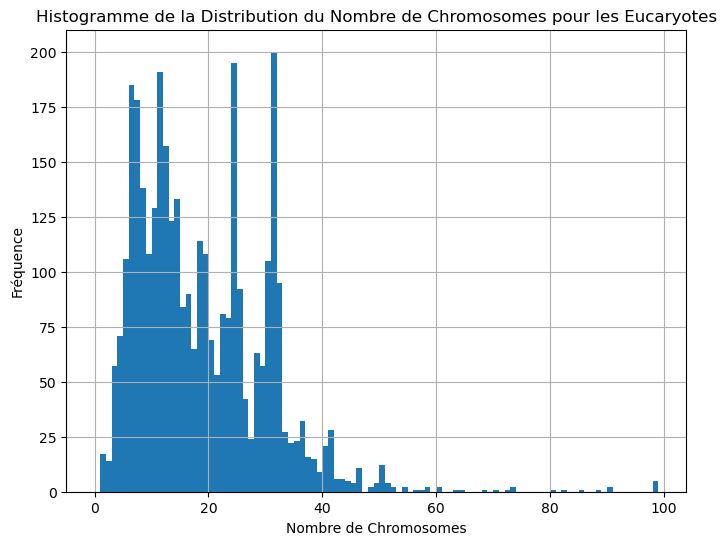

In [92]:
chromosome_counts = []
for line in data:
    number_chroms = line[5]
    if number_chroms != '-' and line[1] == "Eukaryota":
        number_chroms = int(number_chroms)
        if number_chroms > maxim:
            maxim = number_chroms
        try:
            chromosome_counts.append(number_chroms)
        except ValueError:
            continue

plt.figure(figsize=(8, 6))
plt.hist(chromosome_counts, bins=range(100))
plt.title('Histogramme de la Distribution du Nombre de Chromosomes pour les Eucaryotes')
plt.xlabel('Nombre de Chromosomes')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

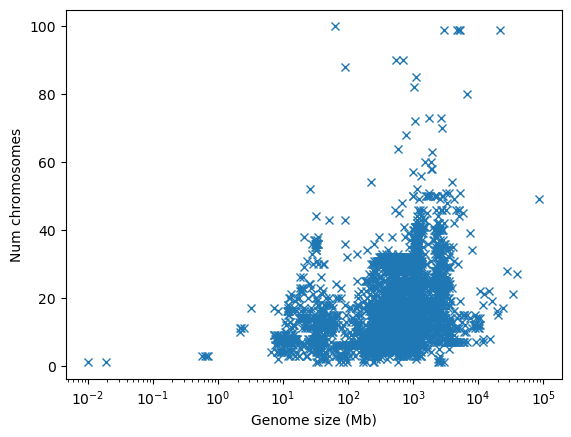

In [99]:
X = []
Y = []

for line in data:
    if line[1] == "Eukaryota" and line[4] != "-" and line[5] != "-":
        size_gnm = float(line[4])
        number_chroms = int(line[5])
        try:
            X.append(size_gnm)
            Y.append(number_chroms)
        except ValueError:
            continue

plt.figure()
plt.plot(X, Y, "x")
plt.xlabel("Genome size (Mb)")
plt.ylabel("Num chromosomes")
plt.xscale("log")

Q21. Qu’observez-vous ?

```markdown
La majorité des chromosomes font entre 10**2 et 10**3 Mb.
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
C'est une petite molécule circulaire d'ADN séparée de l'ADN chromosomique, capable de se répliquer indépendamment et souvent utilisée dans les manipulations génétiques.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

Bacteria -> mean : 0.22074042462391977
Eukaryota -> mean : 0.002570694087403599
Viruses -> mean : 0.0
Archaea -> mean : 0.18603623508616882


Text(0.5, 1.0, 'Nombre de plasmides par royaume')

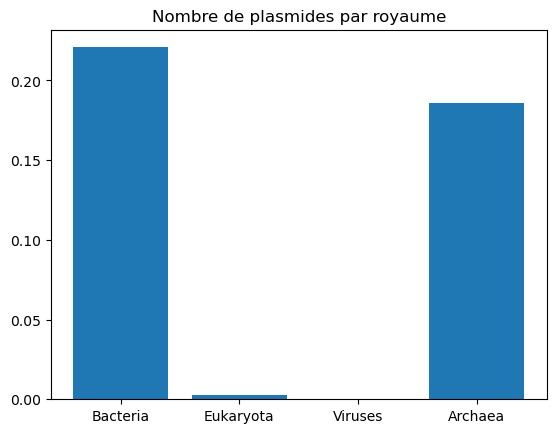

In [112]:
means = []
list_kgdm = []
for k in kgdms:
    elts = []
    list_kgdm.append(k)
    for line in data:
        kgdm = line[1]
        nb_plasmides = line[7]
        if (kgdm == k):
            if (nb_plasmides == '-'):
                nb_plasmides = 0
            else:
                nb_plasmides = int(nb_plasmides)
            elts.append(nb_plasmides)
    mean = np.mean(elts)
    means.append(mean)

idx = 0
for elt in list_kgdm:
    print(f"{elt} -> mean : {means[idx]}")
    idx += 1
    
plt.figure()
plt.bar(list_kgdm, means)
plt.title("Nombre de plasmides par royaume")

Q24. Qu'observez-vous ?

```markdown
La moyenne de plasmide est plus importante pour les Bacteries et les Archaea que le reste.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Ce sont les séquences génomiques.
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

Bacteria -> mean : 19.005521177851275
Eukaryota -> mean : 2.452050392081244
Viruses -> mean : 2.6679765449912503
Archaea -> mean : 8.144498453380468


Text(0.5, 1.0, 'Nombre de plasmides par royaume')

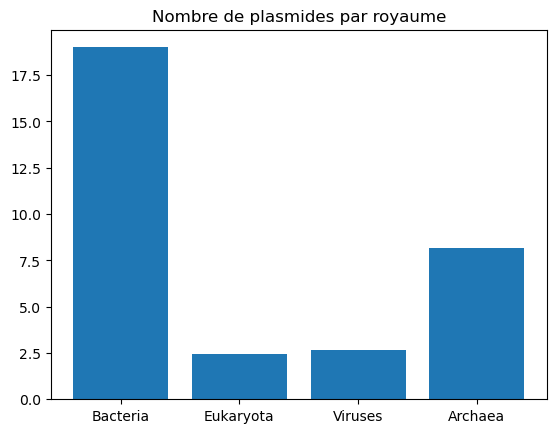

In [115]:
means = []
list_kgdm = []
for k in kgdms:
    elts = []
    list_kgdm.append(k)
    for line in data:
        kgdm = line[1]
        nb_project = line[8]
        if (kgdm == k and nb_project != "-"):
            nb_project = float(nb_project)
            elts.append(nb_project)
    mean = np.mean(elts)
    means.append(mean)

idx = 0
for elt in list_kgdm:
    print(f"{elt} -> mean : {means[idx]}")
    idx += 1
    
plt.figure()
plt.bar(list_kgdm, means)
plt.title("Nombre de plasmides par royaume")

Q27. Combien d'organismes ont 0 projets ?

In [119]:
cpt = 0
for line in data:
    if line[8] == "-":
        cpt += 1
print(cpt)

2


Q28. Combien d'organismes ont > 1 projets ?

In [121]:
cpt = 0
for line in data:
    if line[8] != "-":
        val = int(line[8])
        if (val > 1):
            cpt += 1
print(cpt)

18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [124]:
list_nb_project = []

for line in data:
    if line[8] != "-":
        val = int(line[8])
        list_nb_project.append((line[0], val))

sorted_list = sorted(list_nb_project, key=lambda x: x[1], reverse=True)

for project in sorted_list[:5]:
    print(project)

('Escherichia coli', 39907)
('Klebsiella pneumoniae', 21229)
('Staphylococcus aureus', 17228)
('Salmonella enterica', 16613)
('uncultured Lachnospiraceae bacterium', 15909)


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Le taux de GC est la proportion de bases nucléotiques dans une séquence ADN qui sont soit des guanines soit des cytosines. On l'utilise pour comprendre la stabilité moléculaire de l'ADN.
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

Text(0, 0.5, 'GC')

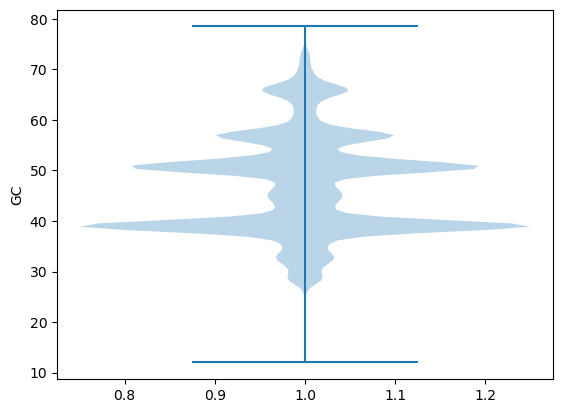

In [131]:
import requests as reqs
data = reqs.get("https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/assembly_summary_genbank_historical.txt")
data = dats.text.split("\n")
data = data[2:-1]
data = [e.split("\t") for e in data]
     
vals = []
for line in data:
    val = float(line[27])
    if (0 < val < 100):
        vals.append(val)
        
plt.violinplot(vals)
plt.ylabel("GC")

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [135]:
X = []
Y = []

for line in data:
    val = float(line[27])
    if (0 < val < 100):
        X.append(line[26])
        Y.append(val)
        
plt.plot(X, Y, "x")
plt.xlabel("taille genome")
plt.ylabel("GC")

Text(0, 0.5, 'GC')

Error in callback <function flush_figures at 0x75733b3b4400> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

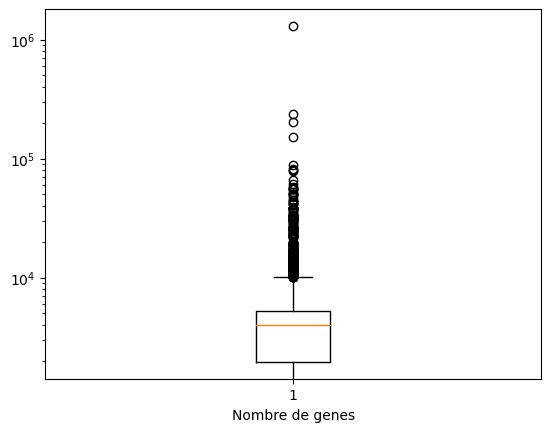

In [136]:
vals = []
for line in data:
    if (line[34] != "na"):
        vals.append(int(line[34]))

plt.boxplot(vals)
plt.xlabel("Nombre de genes")
plt.yscale("log")
plt.show()

Q8. Qu'observez-vous ?

```markdown
Le nombre moyen de gene est entre 10**3 et 10**4
```

Q9. Enlevez les données aberrantes (outliers)

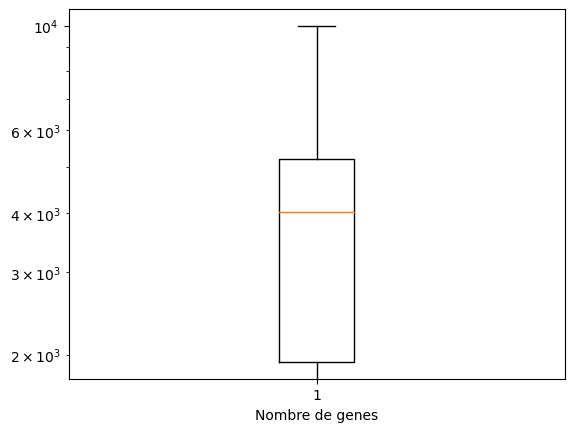

In [138]:
vals = []
for line in data:
    if (line[34] != "na" and int(line[34]) < 10000):
        vals.append(int(line[34]))

plt.boxplot(vals)
plt.xlabel("Nombre de genes")
plt.yscale("log")
plt.show()

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
J'ai enlevé toutes les données avec une valeur supérieur à 10**4.
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

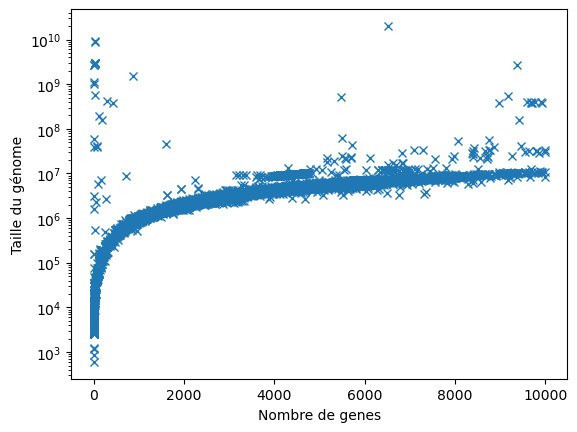

In [140]:
X = []
Y = []

for line in data:
    if (line[34] != "na" and 0 < int(line[34]) < 10000):
        X.append(int(line[34]))
        Y.append(int(line[26]))

plt.plot(X, Y, "x")
plt.xlabel("Nombre de genes")
plt.ylabel("Taille du génome")
plt.yscale("log")
plt.show()

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [166]:
filepath = "GCA_009729015.1_ASM972901v1_genomic.fna"

# Loading file
def get_data():
    with open(filepath) as file:
        lines = file.readlines()
        return ''.join(lines[1:]).replace('\n', '')

data = get_data()

def calculate_gc_content(sequence):
    nb_g = sequence.count('G')
    nb_c = sequence.count('C')
    return (nb_g + nb_c) / len(sequence)

GC = get_GC(data)
print(GC * 100)

34.23293770456571


Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

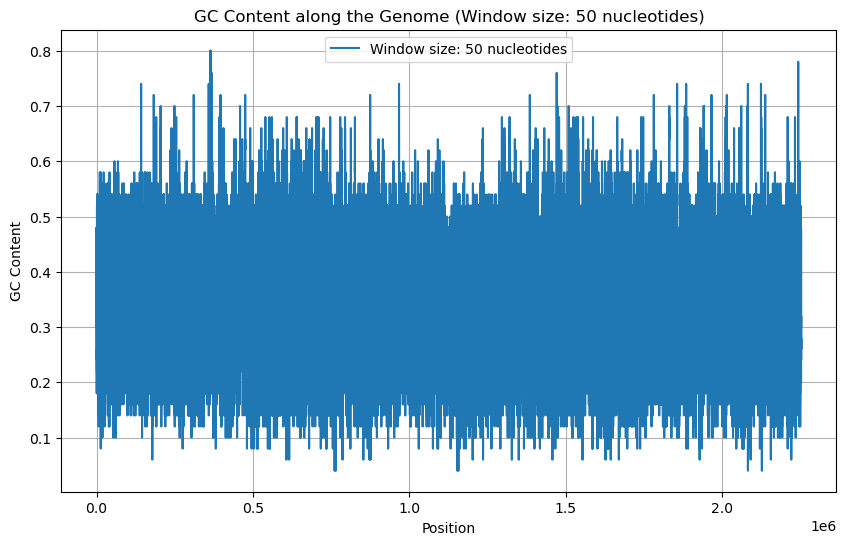

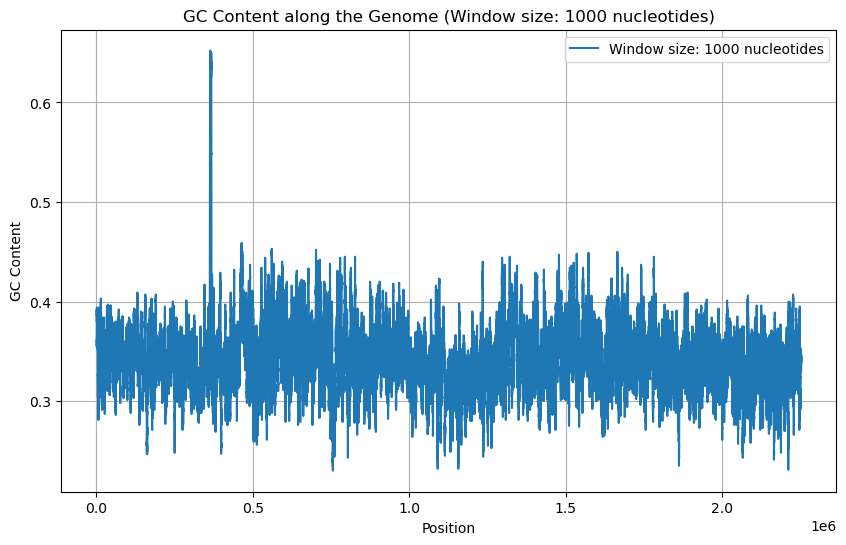

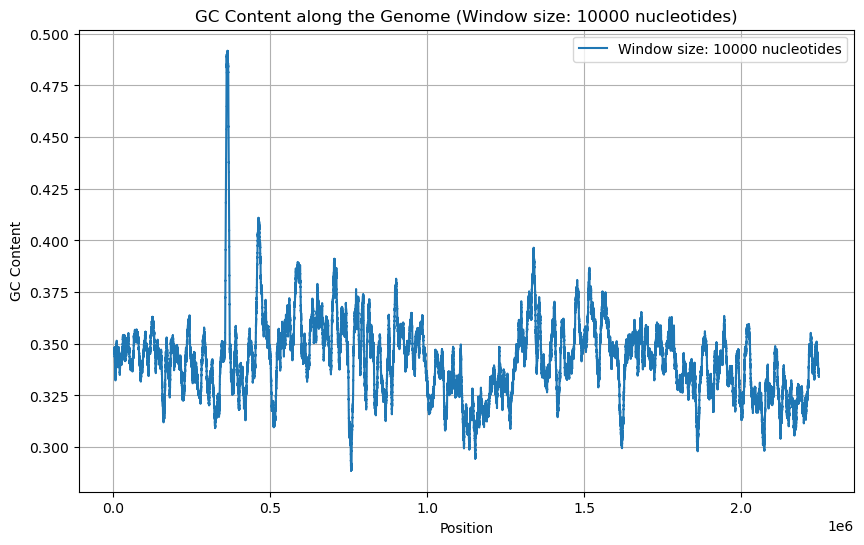

In [169]:
def sliding_window_gc_content(sequence, window_size):
    half_win_size = window_size // 2
    gc_contents = []
    positions = []
    for i in range(half_win_size, len(sequence) - half_win_size):
        window = sequence[i - half_win_size : i + half_win_size]
        gc_content = calculate_gc_content(window)
        gc_contents.append(gc_content)
        positions.append(i)
    return positions, gc_contents

window_sizes = [50, 1000, 10000]
for window_size in window_sizes:
    positions, gc_contents = sliding_window_gc_content(genome_sequence, window_size)
    plt.figure(figsize=(10, 6))
    plt.plot(positions, gc_contents, label=f'Window size: {window_size} nucleotides')
    plt.title(f'GC Content along the Genome (Window size: {window_size} nucleotides)')
    plt.xlabel('Position')
    plt.ylabel('GC Content')
    plt.legend()
    plt.grid(True)
    plt.show()

Q4. Qu’observez-vous ?

```markdown
Il n'est pas du tout constant donc le génome n'est pas stable ici.
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

Processing window size: 50


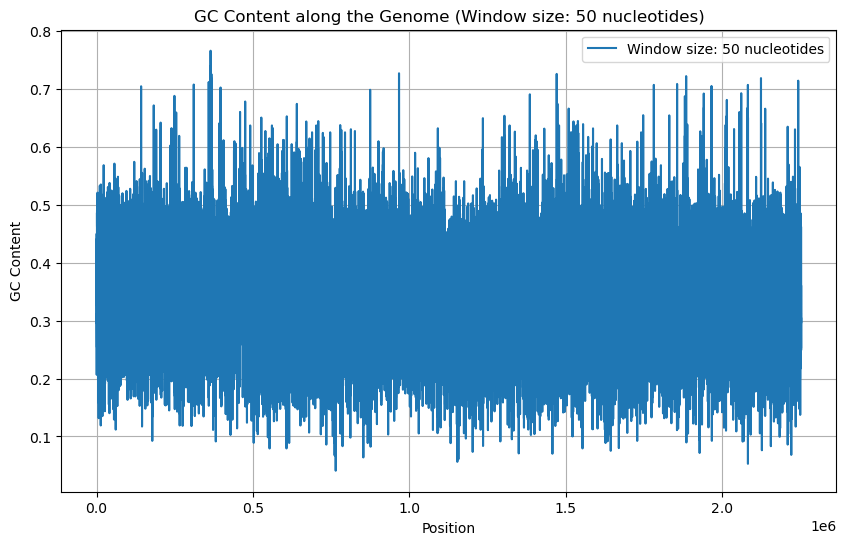

Finished processing window size: 50
Processing window size: 1000


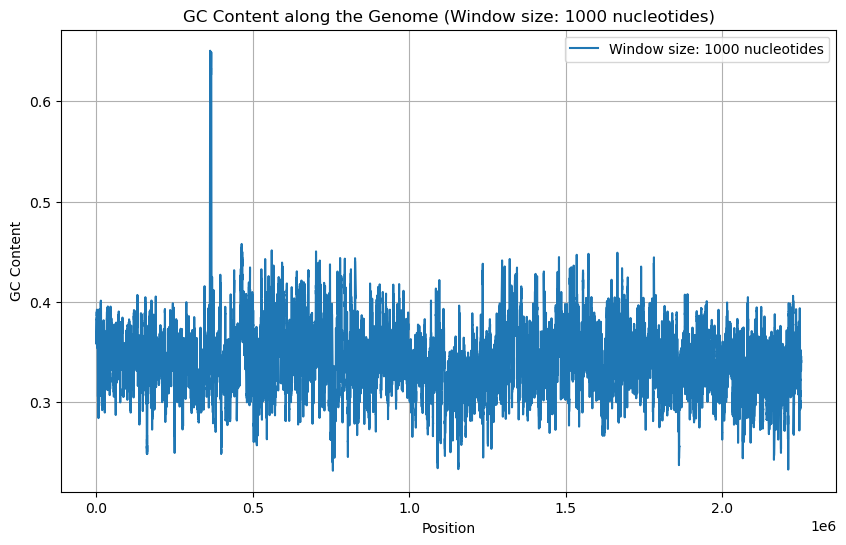

Finished processing window size: 1000
Processing window size: 10000


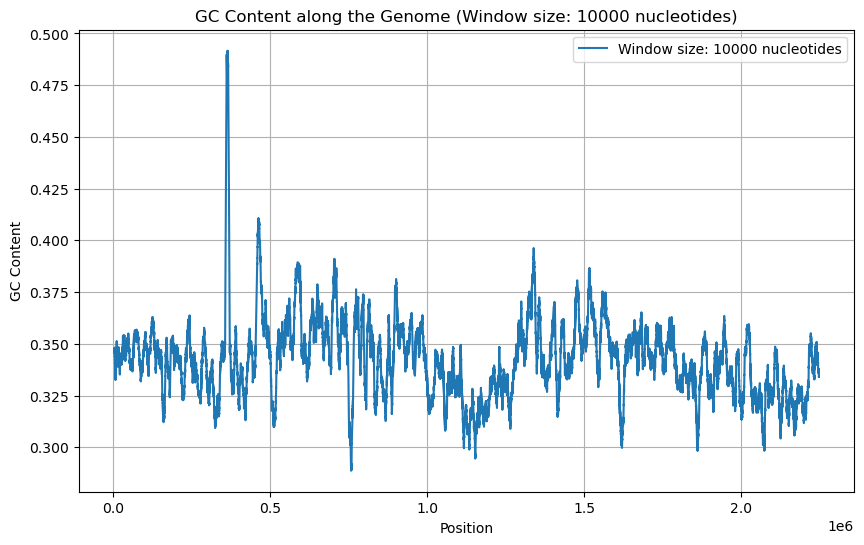

Finished processing window size: 10000


In [168]:
from scipy.signal import savgol_filter

window_sizes = [50, 1000, 10000]
for window_size in window_sizes:
    positions, gc_contents = sliding_window_gc_content(genome_sequence, window_size)
    
    smoothed_gc_contents = savgol_filter(gc_contents, 51, 3)
    
    plt.figure(figsize=(10, 6))
    plt.plot(positions, smoothed_gc_contents, label=f'Window size: {window_size} nucleotides')
    plt.title(f'GC Content along the Genome (Window size: {window_size} nucleotides)')
    plt.xlabel('Position')
    plt.ylabel('GC Content')
    plt.legend()
    plt.grid(True)
    plt.show()


Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [170]:
def get_local_GC(filepath, win_size):
    # Loading file
    data = get_data()
    
    # Compute the GC
    GC = calculate_gc_content()
    print(GC * 100)
    
    # Window size
    positions, gc_contents = sliding_window_gc_content(data, win_size)
    
    # Apply the signal lissage
    smoothed_gc_contents = savgol_filter(gc_contents, 51, 3)
    
    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(positions, smoothed_gc_contents, label=f'Window size: {window_size} nucleotides')
    plt.title(f'GC Content along the Genome (Window size: {window_size} nucleotides)')
    plt.xlabel('Position')
    plt.ylabel('GC Content')
    plt.legend()
    plt.grid(True)
    plt.show()    